## MARKOVIAN ANALYSIS AND PREDICTION OF CRIMINAL OFFENSES

##Here's the full Python code to model this Markov Chain problem, compute the fundamental matrix UU, and compare it with the observed values. The code follows these steps:

    Define the Transition Matrix PP

    Extract the Transient Matrix QQ

    Compute the Fundamental Matrix U=(I−Q)−1U=(I−Q)−1

    Compute the Expected Absorption Times

    Compare the Observed and Expected Crime Counts

    Display Results in a Readable Format

In [2]:
import numpy as np
import pandas as pd
import scipy.linalg


# Transition matrix P (including absorbing state F)
P = np.array([
    [1, 0, 0, 0, 0, 0],  # F (absorbing state)
    [0.3068, 0.4473, 0.0685, 0.1054, 0.0228, 0.0492],  # N
    [0.3314, 0.4090, 0.0920, 0.0854, 0.0222, 0.0600],  # I
    [0.2126, 0.4051, 0.0530, 0.2130, 0.0235, 0.0928],  # T
    [0.1770, 0.5013, 0.0882, 0.1463, 0.0529, 0.0343],  # D
    [0.2478, 0.3922, 0.0703, 0.1378, 0.0169, 0.1350],  # C
])

# Extract the transient submatrix Q (excluding the absorbing state F)
Q = P[1:, 1:]

# Compute the fundamental matrix U = (I - Q)^(-1)
I = np.eye(Q.shape[0])  # Identity matrix
U = np.linalg.inv(I - Q)

# Compute the expected number of crimes before absorption (row sums of U)
expected_crimes = U.sum(axis=1)

# Display results
states = ['N', 'I', 'T', 'D', 'C']
U_df = pd.DataFrame(U, index=states, columns=states)
expected_crimes_df = pd.DataFrame(expected_crimes, index=states, columns=['Total Expected Crimes'])

print("Fundamental Matrix U:")
print(np.round(U_df,2))
print("Expected Crimes Before Desistance:")
print(np.round(expected_crimes_df,2))

# Observed mean offenses (from Figlio's study)
observed_offenses = np.array([
    [2.06, 0.14, 0.27, 0.06, 0.13],
    [1.25, 1.27, 0.28, 0.09, 0.13],
    [1.41, 0.23, 1.55, 0.07, 0.23],
    [1.37, 0.19, 0.44, 1.11, 0.19],
    [1.81, 0.29, 0.54, 0.11, 1.56],
])

# Convert observed data into DataFrame
observed_df = pd.DataFrame(observed_offenses, index=states, columns=states)
print("Observed Mean Offenses:")
print(np.round(observed_df,2))

# Compare expected vs observed
comparison_df = observed_df.copy()
comparison_df['Total Expected Crimes'] = expected_crimes
comparison_df['Total Observed Crimes'] = observed_offenses.sum(axis=1)
print("Comparison of Expected and Observed Crimes:")
print(np.round(comparison_df,2))

Fundamental Matrix U:
      N     I     T     D     C
N  2.51  0.24  0.41  0.08  0.21
I  1.43  1.25  0.38  0.08  0.21
T  1.62  0.24  1.58  0.09  0.28
D  1.77  0.29  0.51  1.12  0.22
C  1.54  0.25  0.48  0.08  1.32
Expected Crimes Before Desistance:
   Total Expected Crimes
N                   3.44
I                   3.35
T                   3.82
D                   3.91
C                   3.67
Observed Mean Offenses:
      N     I     T     D     C
N  2.06  0.14  0.27  0.06  0.13
I  1.25  1.27  0.28  0.09  0.13
T  1.41  0.23  1.55  0.07  0.23
D  1.37  0.19  0.44  1.11  0.19
C  1.81  0.29  0.54  0.11  1.56
Comparison of Expected and Observed Crimes:
      N     I     T     D     C  Total Expected Crimes  Total Observed Crimes
N  2.06  0.14  0.27  0.06  0.13                   3.44                   2.66
I  1.25  1.27  0.28  0.09  0.13                   3.35                   3.02
T  1.41  0.23  1.55  0.07  0.23                   3.82                   3.49
D  1.37  0.19  0.44  1.11  0.

## Model Accuracy

In [4]:
from sklearn.metrics import mean_absolute_error

# expected patient distribution (from Markov model, rounded to 4 decimal places)
expected = np.round(expected_crimes,2)
observed = np.round((observed_offenses.sum(axis=1)),2)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(observed, expected)

# Convert MAE into accuracy percentage
accuracy = round((1 - (mae / np.mean(observed))) * 100, 2)

# Print the model accuracy
print(f"Model Accuracy: {accuracy}%")

Model Accuracy: 83.97%


## Model's accuracy using the Chi-Square test

In [6]:
from scipy.stats import chisquare

# Scale expected values to match the sum of observed values
expected = expected * (np.sum(observed) / np.sum(expected))

# Compute chi-square test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Print results
print(f"Chi-Square Statistic: {chi_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation of the model accuracy
if p_value > 0.05:
    print("The model fits well (no significant difference between expected and observed values).")
else:
    print("The model does not fit well (significant difference between expected and observed values).")

Chi-Square Statistic: 0.3635
P-Value: 0.9854
The model fits well (no significant difference between expected and observed values).


## Graph Visualization

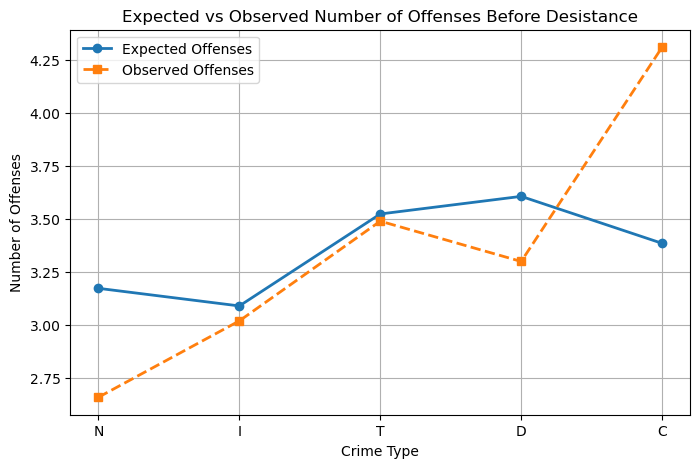

In [14]:
import matplotlib.pyplot as plt

# State labels
states = ["N", "I", "T", "D", "C"]

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(states, expected, marker='o', linestyle='-', label="Expected Offenses", linewidth=2)
plt.plot(states, observed, marker='s', linestyle='--', label="Observed Offenses", linewidth=2)

# Labels and title
plt.xlabel("Crime Type")
plt.ylabel("Number of Offenses")
plt.title("Expected vs Observed Number of Offenses Before Desistance")
plt.legend()
plt.grid(True)

# Show the graph
plt.show()